# Lab 1 Part I: MNIST 2D CNN

## Imports

In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Activation, AveragePooling2D
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.activations import softmax

In [2]:
from google.colab import files
import zipfile
import os

# Téléchargez le fichier ZIP
uploaded = files.upload()

# Supposons que le fichier ZIP s'appelle "digits.zip"
zip_filename = "digits.zip"

# Extrayez le fichier ZIP
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall("/content/digits")

# Le chemin vers le dossier extrait
folder_path = "/content/digits/digits"

print("Fichiers extraits dans le dossier:", folder_path)


Saving digits.zip to digits.zip
Fichiers extraits dans le dossier: /content/digits/digits


## Load and format MNIST dataset

In [3]:
from sklearn import model_selection
from pathlib import Path
import librosa
import copy
import matplotlib
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input, Conv1D, MaxPool1D, Flatten, Dense, AvgPool1D, Activation
from keras.utils import get_file
from keras.activations import softmax
from keras.utils import to_categorical



x_train shape: (15186, 28, 28, 1)
y_train shape: (15186, 10)
x_test shape: (3797, 28, 28, 1)
y_test shape: (3797, 10)


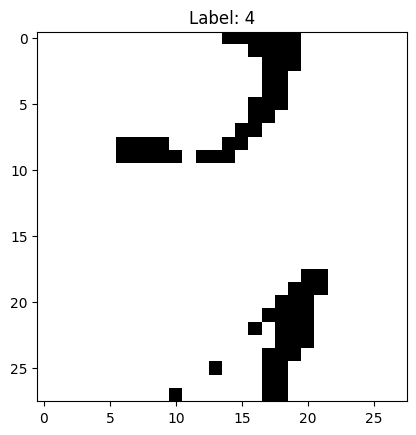

In [4]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt

def load_digit_images(folder_path, img_size=(28, 28)):
    images = []
    labels = []
    for digit in range(10):
        digit_folder = os.path.join(folder_path, str(digit))
        if os.path.exists(digit_folder):
            for filename in os.listdir(digit_folder):
                if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
                    img_path = os.path.join(digit_folder, filename)
                    # Charger l'image en niveaux de gris
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    # Redimensionner l'image
                    img = cv2.resize(img, img_size)
                    # Appliquer un seuil binaire pour obtenir une image en noir et blanc
                    _, img_binary = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
                    images.append(img_binary)
                    labels.append(digit)
    return np.array(images), np.array(labels)

# Charger les images de chiffres et les étiquettes
x_data, y_data = load_digit_images(folder_path, img_size=(28, 28))

# Normaliser les images
x_data = x_data.astype('float32') / 255.0

# Remodeler les images pour correspondre à la nouvelle taille
x_data = x_data.reshape((-1, 28, 28, 1))

# Convertir les étiquettes en encodage one-hot
y_data = to_categorical(y_data, 10)

# Diviser les données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# Afficher une image d'exemple pour vérifier la résolution
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.title(f'Label: {np.argmax(y_train[0])}')
plt.show()


## Build model

In [ ]:
pip install pydot graphviz


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

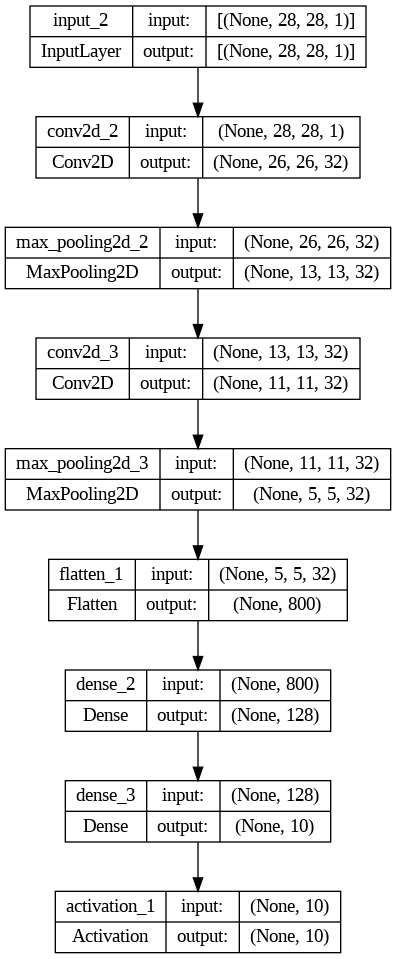

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import plot_model

# Define the model
model = Sequential()
model.add(Input(shape=(28, 28, 1)))  # Input layer with shape (28, 28, 1)
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))  # Conv2D layer
model.add(MaxPooling2D(pool_size=2))  # MaxPooling2D layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))  # Another Conv2D layer
model.add(MaxPooling2D(pool_size=2))  # Another MaxPooling2D layer
model.add(Flatten())  # Flatten the output to feed into a Dense layer
model.add(Dense(units=128, activation='relu'))  # Dense layer
model.add(Dense(units=10, activation='relu'))  # Output layer for classification
model.add(Activation('softmax'))


# Print model summary
model.summary()

# Plot model architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


## Train model

In [21]:
from keras.optimizers import Adam

# Créer un nouvel optimiseur
optimizer = Adam()

# Compiler à nouveau le modèle avec le nouvel optimiseur
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))


Epoch 1/30
475/475 [==============================] - 7s 13ms/step - loss: 0.7815 - accuracy: 0.7837 - val_loss: 0.4449 - val_accuracy: 0.9110
Epoch 2/30
475/475 [==============================] - 6s 12ms/step - loss: 0.2988 - accuracy: 0.9352 - val_loss: 0.1233 - val_accuracy: 0.9600
Epoch 3/30
475/475 [==============================] - 5s 11ms/step - loss: 0.1062 - accuracy: 0.9668 - val_loss: 0.1091 - val_accuracy: 0.9655
Epoch 4/30
475/475 [==============================] - 5s 11ms/step - loss: 0.0746 - accuracy: 0.9760 - val_loss: 0.0838 - val_accuracy: 0.9708
Epoch 5/30
475/475 [==============================] - 6s 12ms/step - loss: 0.0591 - accuracy: 0.9812 - val_loss: 0.0895 - val_accuracy: 0.9694
Epoch 6/30
475/475 [==============================] - 5s 11ms/step - loss: 0.0457 - accuracy: 0.9851 - val_loss: 0.0634 - val_accuracy: 0.9800
Epoch 7/30
475/475 [==============================] - 6s 12ms/step - loss: 0.0385 - accuracy: 0.9878 - val_loss: 0.0927 - val_accuracy: 0.9723

## Evaluate model

In [22]:
model.evaluate(x_test, y_test, verbose=2)
pred_test = model.predict(x_test)
print(tf.math.confusion_matrix(y_test.argmax(axis=1), pred_test.argmax(axis=1)))

119/119 - 1s - loss: 0.0848 - accuracy: 0.9837 - 552ms/epoch - 5ms/step
119/119 [==============================] - 1s 5ms/step
tf.Tensor(
[[387   0   1   0   5   0   0   0   5   1]
 [  2 396   0   0   2   0   0   1   0   1]
 [  0   2 448   0   0   0   0   1   2   1]
 [  1   0   3 378   0   0   0   0   1   0]
 [  1   2   1   0 404   1   0   2   0   0]
 [  1   1   1   0   1 438   0   0   3   0]
 [  1   1   0   0   0   0 206   0   0   1]
 [  0   1   0   0   1   0   0 297   0   0]
 [  1   0   4   0   1   1   0   0 393   2]
 [  2   0   1   0   1   0   0   1   0 388]], shape=(10, 10), dtype=int32)


## Save trained model

In [23]:
model.save('project.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saving 4.png to 4.png
Image en niveaux de gris après traitement:


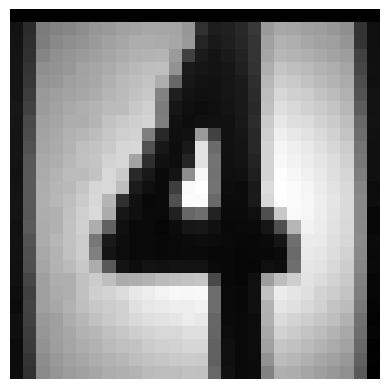

1/1 [==============================] - 0s 59ms/step
Processed image saved at: /content/processed_image_0.png


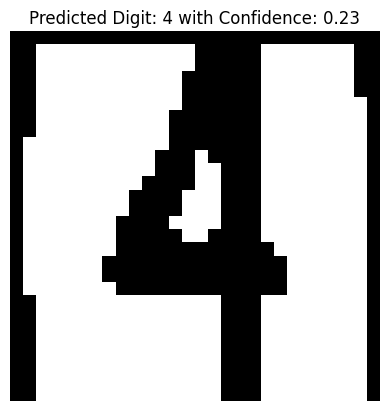

Image 1 - Predicted Digit: 4
Image 1 - Confidence: 0.23196931


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from google.colab import files

# Charger votre modèle
model = load_model('project.h5')

def predict_and_save(image_path, output_path):
    # Charger l'image en couleur
    img = cv2.imread(image_path)

    # Vérifier si l'image a été chargée correctement
    if img is None:
        print(f"Erreur: l'image à {image_path} n'a pas pu être chargée.")
        return None, None

    # Redimensionner l'image pour correspondre à la taille de l'image MNIST
    img_resized = cv2.resize(img, (28, 28))

    # Convertir l'image en niveaux de gris (si nécessaire)
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

    # Afficher l'image en niveaux de gris après traitement
    print("Image en niveaux de gris après traitement:")
    plt.imshow(img_gray, cmap='gray')
    plt.axis('off')
    plt.show()

    # Appliquer un seuil binaire pour obtenir une image en noir et blanc
    _, img_binary = cv2.threshold(img_gray, 80, 255, cv2.THRESH_BINARY)

    # Normaliser l'image
    img_normalized = img_binary.astype('float32') / 255.0
    # Remodeler l'image pour correspondre à la forme d'entrée du modèle
    img_reshaped = img_normalized.reshape((1, 28, 28, 1))
    # Faire la prédiction
    prediction = model.predict(img_reshaped)
    # Obtenir le chiffre prédit
    predicted_digit = np.argmax(prediction)
    # Obtenir l'indice de confiance
    confidence = np.max(prediction)

    # Enregistrer l'image traitée
    save_path = output_path
    cv2.imwrite(save_path, img_binary)
    print(f"Processed image saved at: {save_path}")

    # Afficher l'image traitée
    plt.imshow(img_binary, cmap='gray')
    plt.title(f'Predicted Digit: {predicted_digit} with Confidence: {confidence:.2f}')
    plt.axis('off')
    plt.show()

    return predicted_digit, confidence

# Télécharger les fichiers d'image
uploaded = files.upload()

# Tester les images téléchargées
for idx, image_name in enumerate(uploaded.keys()):
    output_path = f"/content/processed_image_{idx}.png"  # Chemin de sortie pour chaque image traitée
    predicted_digit, confidence = predict_and_save(image_name, output_path)
    if predicted_digit is not None:
        print(f"Image {idx+1} - Predicted Digit:", predicted_digit)
        print(f"Image {idx+1} - Confidence:", confidence)


In [24]:
if isinstance(model.layers[-1], Activation) and model.layers[-1].activation == softmax:
    model = tf.keras.Model(model.input, model.layers[-2].output, name=model.name)
else:
    print('Error: last layer is not SoftMax Activation')

In [25]:
%pip install qualia_codegen_core
import qualia_codegen_core
from qualia_codegen_core.graph.KerasModelGraph import KerasModelGraph
from qualia_codegen_core.graph.Quantization import Quantization
from qualia_codegen_core.graph.RoundMode import RoundMode

from importlib.resources import files
main_path = str((files('qualia_codegen_core.examples')/'Linux'/'main.cpp').resolve())

In [26]:
modelgraph = KerasModelGraph(model).convert()
print(modelgraph)
print(modelgraph.nodes)  # Affiche les nœuds du modèle



—————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
Inputs                                           | Layer                                            | Outputs                                          | Input shape                                      | Output shape                                    
—————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
                                                 | input_2                                          | conv2d_2                                         | (1, 28, 28, 1)                                   | ((1, 28, 28, 1),)                  

In [27]:
float_modelgraph = copy.deepcopy(modelgraph)


# layer quantization annotations for float32
for node in float_modelgraph.nodes:
    # No scale factor if not fixed-point quantization on integers
    node.q = Quantization(
            number_type=float,
            width=32,
            long_width=32,
            weights_scale_factor=0,
            output_scale_factor=0,
            weights_round_mode=RoundMode.NONE,
            output_round_mode=RoundMode.NONE,
            )
print(float_modelgraph)

float_res = qualia_codegen_core.Converter(output_path=Path('gsc_output_floating')).convert_model(float_modelgraph)

with open('gsc_model_floating.h', 'w') as f:
    f.write(float_res)

—————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
Inputs                                           | Layer                                            | Outputs                                          | Input shape                                      | Output shape                                    
—————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
                                                 | input_2                                          | conv2d_2                                         | (1, 28, 28, 1)                                   | ((1, 28, 28, 1),)                  

In [28]:
!g++ -std=c++17 -Wall -Wextra -pedantic -Ofast -o gsc_fixed -include gsc_output_floating/include/defines.h -Igsc_output_floating/include gsc_output_floating/model.c {main_path}

In file included from gsc_output_floating/model.c:15:
gsc_output_floating/include/number.h: In function ‘float scale_number_t_float(float, int, round_mode_t)’:
gsc_output_floating/include/number.h:143:21: warning: unused parameter ‘scale_factor’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-parameter-Wunused-parameter]8;;]
  143 |   float number, int scale_factor, round_mode_t round_mode) {
      |                 ~~~~^~~~~~~~~~~~
gsc_output_floating/include/number.h:143:48: warning: unused parameter ‘round_mode’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-parameter-Wunused-parameter]8;;]
  143 |   float number, int scale_factor, round_mode_t round_mode) {
      |                                   ~~~~~~~~~~~~~^~~~~~~~~~
gsc_output_floating/include/number.h: In function ‘float scale_and_clamp_to_number_t_float(float, int, round_mode_t)’:
gsc_output_floating/include/number.h:151:21: warning: unused parameter ‘scale_fact

In [29]:
fixed_modelgraph = copy.deepcopy(modelgraph)

# layer quantization annotations for int16 Q9.7
for node in fixed_modelgraph.nodes:
    node.q = Quantization(
            number_type=int,
            width=16,
            long_width=32,
            weights_scale_factor=7,
            output_scale_factor=7,
            weights_round_mode=RoundMode.FLOOR,
            output_round_mode=RoundMode.FLOOR,
            )

fixed_res = qualia_codegen_core.Converter(output_path=Path('gsc_output_fixed')).convert_model(fixed_modelgraph)

with open('gsc_model_fixed.h', 'w') as f:
    f.write(fixed_res)

In [30]:
!g++ -std=c++17 -Wall -Wextra -pedantic -Ofast -o gsc_fixed -include gsc_output_fixed/include/defines.h -Igsc_output_fixed/include gsc_output_fixed/model.c {main_path}
